(tema:1)=
# Tema 1: Gradientmetoden

I dette tema-projekt skal vi undersøge gradientmetoden (også kaldet gradientnedstigningsalgoritmen), som er en metode eller algoritme til bestemmelse af ekstremum (maksimum eller minimum) for en funktion af flere variable. Metoden bruges i mange ingeniør-sammenhænge i forbindelse med optimering, fx under træning af kunstig intelligens i machine learning. På engelsk hedder metoden gradient decent method eller steepest decent method.

I mange ingeniørproblemer har man brug for at enten minimere eller maksimere en given skalar-funktion $f : \mathbb{R}^n \to \mathbb{R}$ af $n$ variable. Minimumsværdien (såfremt den eksisterer) kan skrives som $\min \{f(\pmb{x}) | \pmb{x} \in \mathbb{R}^n \}$ dvs den mindste værdi i billedmængden/værdimængden $\min \operatorname{im}(f)$. Lad os kalde minimumsværdien for $A \in \mathbb{R}$. Man er ofte ikke interesseret i selve funktionsværdien (altså minimumsværdien) men derimod i den vektor $\pmb{x}^\dagger$ *hvor* funktionen antager sin minimumsværdi: $f(\pmb{x}^{\dagger}) = A$. Dette er også tilfældet i denne temaøvelse.

Ved træning af neurale netværk har man ofte brug for at finde minimum for funktioner af **mange** variable, for fx ChatGPt+ regner man med 10 milliarder variable. Vi vil nøjes med at kigge på funktioner af to variable, da mange af problemerne ved at finde minima allerede optræder her.

> Tip:
> Du bør starte tema-øvelsen med at downloade opgaven som en "Jupyter Notebook" `.ipynb`-fil. Du gør dette ved at klikke på pilen ![Arrow](./download_pil.png) ovenfor. Du kan herefter åbne tema-øvelsen direkte i VS Code.

## Minimum eller maximum?

### Spørgsmål a
Antag at vi har en algoritme eller metode der kan finde minimum af en funktion dvs $\pmb{x}^\dagger$ så $f(\pmb{x}^{\dagger}) = A$. Vi bliver nu bedt om at finde *maksimumværdien* for en funktion $g : \mathbb{R}^n \to \mathbb{R}$ altså $g(\pmb{x}^{\dagger}) = B$, hvor $B:=\max \operatorname{im}(g)$. Hvordan vil du gribe opgaven an? 

*Hint: Hvordan kan man ændre på $g$-funktionen så en maksimumsværdi bliver til en minimumsværdi*

#### Svar:
For at svare på dette kan vi definere en anden funktion:
$$
h(x^\dagger) = -g(x^\dagger)
$$
Da maksimum af $g$ svarer til minimum af $h$, kan man anvende minimumsalgoritme på $h$. Hvis algoritmen finder et punkt $x^\dagger$ således at
$$
h(x^\dagger) = min h(x), \quad x \in \mathbb{R}^n
$$
så er det også tilfældet, at
$$
g(x^\dagger) = -h(x^\dagger) = max g(x), \quad x \in \mathbb{R}^n
$$
Denne fremgangsmåde udnytter direkte egenskaben, at at tage den negative af en funktion "spejler" dens optima: det, der er minimum for $−g$, bliver maksimum for $g$. 

Med dette på plads kan vi nøjes med at betragte optimeringsproblemet hvor vi skal finde *minimums*-værdier. Generelt kan funktioner have flere minimumspunkter, men vi vil kun kigge på funktioner der har præcist *et punkt* $\pmb{x}^{\dagger}$ så $f(\pmb{x}^{\dagger}) = A$, hvor $A$ er minimumsværdien af billedmængden.

## Test-funktionerne

In [139]:
from dtumathtools import *
from sympy import *
init_printing()

Vi betragter følgende tre funktioner af formen $f_i: \mathbb{R}^2 \to \mathbb{R}$:

\begin{align*}
f_1(x_1,x_2) &= a x_{1}^{2} + x_{2}^{2} \\
f_2(x_1,x_2) &= q(x_1,x_2) \\
f_3(x_1,x_2)  &= (1-x_{1})^{2}+100(x_{2}-x_{1}^{2})^{2}
\end{align*}
hvor $a$ og $\lambda_1$ er *positive* reelle tal og den kvadratiske form $q$ er defineret i Python-koden nedenfor. Funktionen $f_1$ er også en (meget simpel) kvadratisk form, mens funktionen $f_3$ er et *fjerdegrads* polynomium. Alle funktionerne har et minimum (men ikke noget maksimum da de vokser mod uendeligt).

In [140]:
# Variable og parameter der ingår i funktionerne
x1, x2 = symbols('x1 x2', real=True)
a, lambda1 = symbols('a lambda1',  positive=True)

In [141]:
def f1(x1, x2, a = 0.5):
    return a * x1**2 + 1 * x2**2

def f2(x1, x2, lambda1 = 0.5):
    Q = 1/sqrt(2) * Matrix([[1,1],[1,-1]])
    A = Q.T * Matrix([[lambda1,0],[0,1]]) * Q
    b = Matrix([-2,4])
    x = Matrix([x1,x2])
    q = x.T * A * x + x.T * b
    return q[0]

def f3(x1, x2):
    return (1 - x1)**2 + 100*(x2 - x1**2)**2

Funktionerne $f_1$ og $f_2$ afhænger af hhv. parametrene $a$ og $\lambda_1$. Standardværdierne (default-værdier) af parametrerne står i hver `def`-linje ovenfor. Vi kan kalde funktioner som følger:

In [142]:
f1(x1,x2), f1(x1,x2,2), f1(x1,x2,a)

Og på lignende vis kan vi se at $f_3$-funktionen faktisk er et fjerdegrads polynomum i $x_1$ og $x_2$:

In [143]:
f3(x1,x2).expand()

### Spørgsmål b

Forklar hvorfor følgende kommandoer giver samme output:

In [144]:
f1(1, 2), f1(1, 2, 0.5)

#### Svar
Det er fordi f1 funktionen har en default værdi for $a = 0.5$, så i begge tilfælde er a defineret til $0.5$.

## Visualisering

Funktionerne kan plottes på følgende vis:

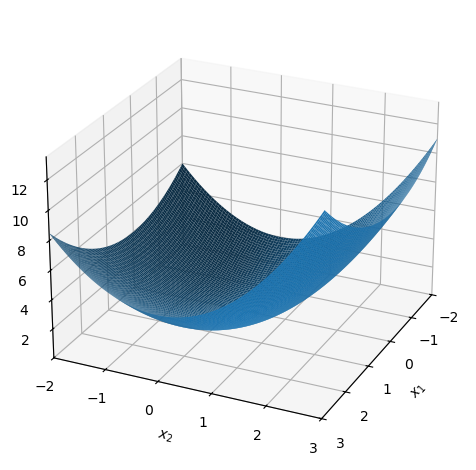

In [145]:
dtuplot.plot3d(f1(x1,x2,0.5), (x1,-2,3), (x2,-2,3), camera = {"elev": 25, "azim": 25})

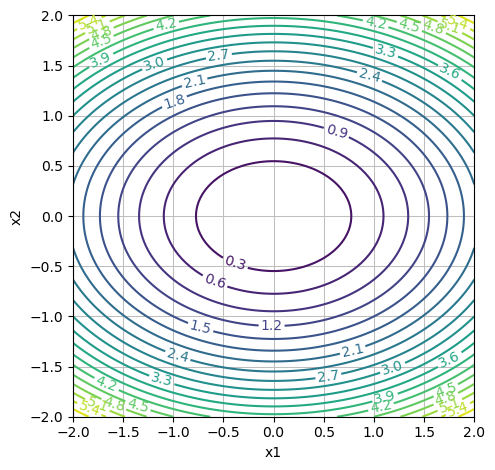

In [146]:
# "levels": 20 is the number of contour lines
dtuplot.plot_contour(f1(x1,x2,0.5), (x1,-2,2), (x2,-2,2), rendering_kw = {"levels": 20}, xlabel = "x1", ylabel = "x2", is_filled=False, aspect=(1.,1.))

Det er nyttigt at kunne bestemme præcist hvilke niveaukurver der plotter. Her plottes:

In [147]:
[0.1, 0.5, *range(1,10,1)]

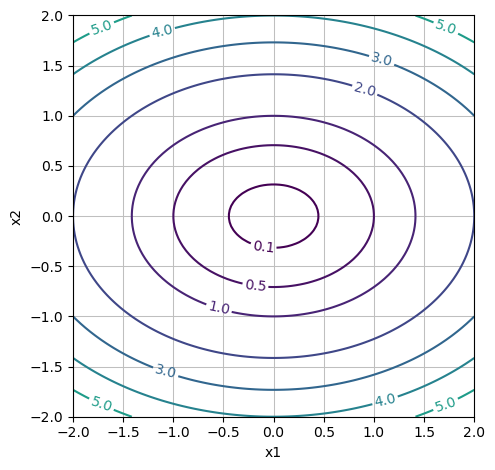

In [148]:
# "levels": [0.1, 0.5, *range(1,10,1)] is the values of the contour lines
dtuplot.plot_contour(f1(x1,x2,0.5), (x1,-2,2), (x2,-2,2), rendering_kw = {"levels": [0.1, 0.5, *range(1,10,1)]}, xlabel = "x1", ylabel = "x2", is_filled=False, aspect=(1.,1.))

### Spørgsmål c

Plot de tre funktioner for forskellige værdier af parametrene $a$ og $\lambda_1$. Husk at de skal være *positive* tal. Du skal som minimum plotte de tre funktioner med standardværdierne af $a$ og $\lambda_1$, men du bør også prøve at se hvad der sker med niveaukurvernes form, når $a$ og $\lambda_1$ fx bliver små (eller store) størrelser som $0.01$. Dine plots bør illustrere hvor funktionerne har minimum, og du skal derfor ændre både intervallerne for $x_1$ og $x_2$ og ændre hvilke niveaukurver der plottes.

#### Svar
Vi starter med f1

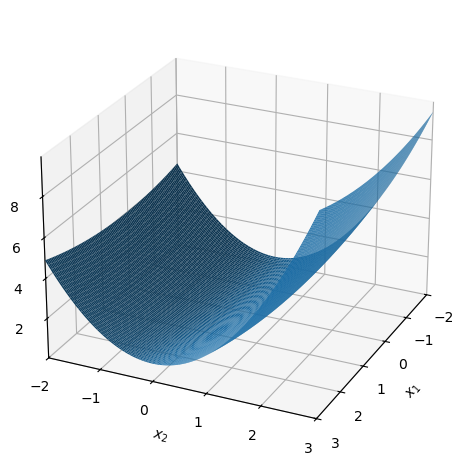

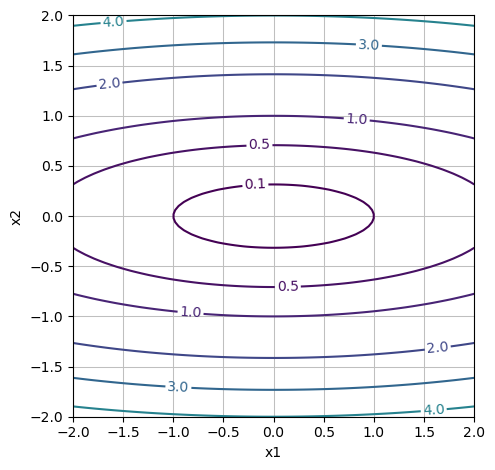

In [149]:
a = 0.1
dtuplot.plot3d(f1(x1,x2,a), (x1,-2,3), (x2,-2,3), camera = {"elev": 25, "azim": 25})
levels = [0.1, 0.5, *range(1,10,1)]
dtuplot.plot_contour(f1(x1,x2,a), (x1,-2,2), (x2,-2,2), rendering_kw = {"levels": levels}, xlabel = "x1", ylabel = "x2", is_filled=False, aspect=(1.,1.))

Nu til f2

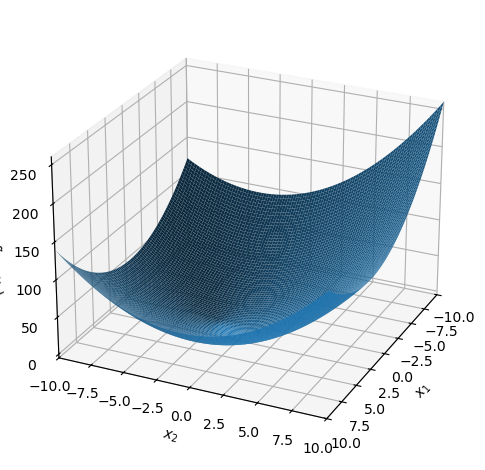

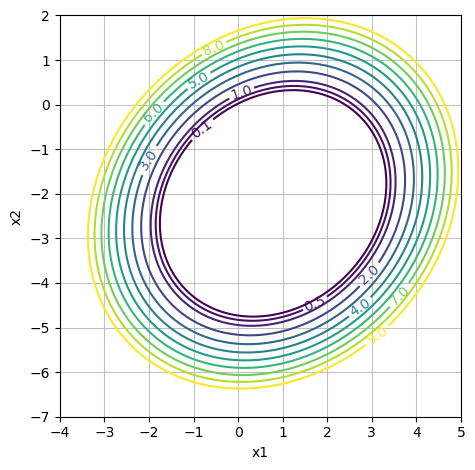

In [150]:
lambda1 = 0.7
dtuplot.plot3d(f2(x1,x2,lambda1), (x1,-10,10), (x2,-10,10), camera = {"elev": 25, "azim": 25})
levels = [0.1, 0.5, *range(1,10,1)]
dtuplot.plot_contour(f2(x1,x2,lambda1), (x1,-4,5), (x2,-7,2), rendering_kw = {"levels": levels}, xlabel = "x1", ylabel = "x2", is_filled=False, aspect=(1.,1.))

Til sidst f3

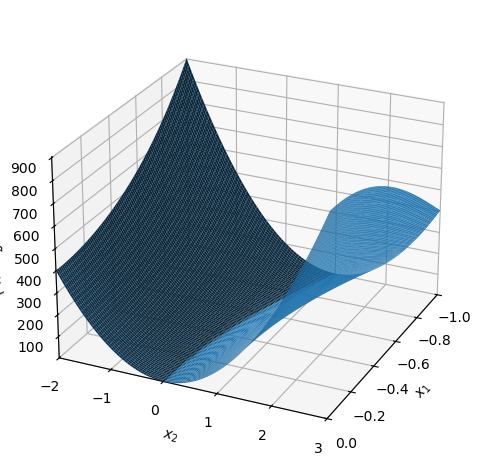

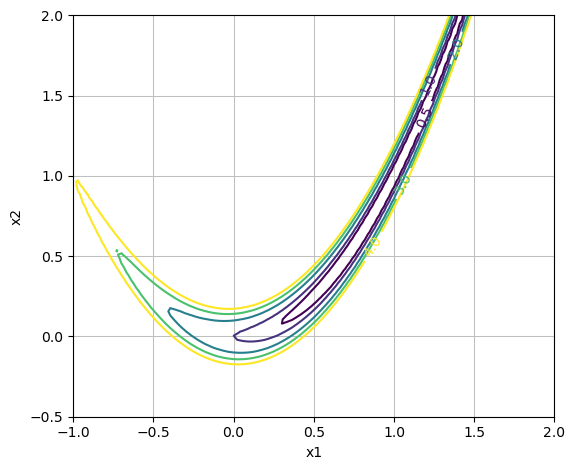

In [151]:
dtuplot.plot3d(f3(x1,x2), (x1,-1,0), (x2,-2,3), camera = {"elev": 25, "azim": 25})
levels = [0.5, 1, *range(2,5,1)]
dtuplot.plot_contour(f3(x1,x2), (x1,-1,2), (x2,-0.5,2), rendering_kw = {"levels": levels}, xlabel = "x1", ylabel = "x2", is_filled=False, aspect=(1.,1.))

### Spørgsmål d

Funktionen $f_3$ kaldes banan-funktionen. Kan du finde en niveau-kurve der ligner en banan? Angiv en funktionsværdi for $f_3$ der giver noget der ligner en banan-niveaukurve. Det bør være en sammenhængende (forbundet) kurve - og ikke to kurver.

#### Svar
Fra forrige opgave fandt vi at ved når f3 løber som følgende får vi noget der ligner en banan:
$$
f_3(x_1,x_2) = 4
$$

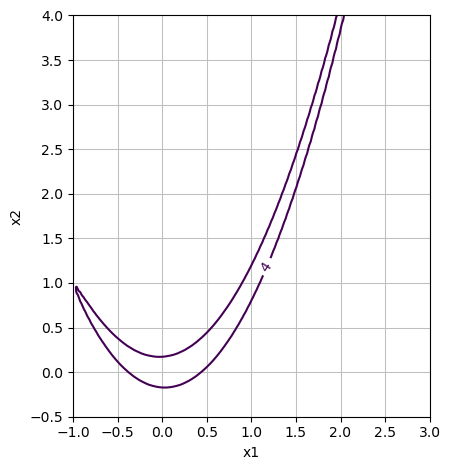

In [152]:
dtuplot.plot_contour(f3(x1,x2), (x1,-1,3), (x2,-0.5,4), rendering_kw = {"levels": [4]}, xlabel = "x1", ylabel = "x2", is_filled=False, aspect=(1.,1.))

### Spørgsmål e

For en af de tre funktioner er det let at gætte/aflæse minimum. Hvilken og hvor er minimum $\pmb{x}^\dagger$?

#### Svar
Vi kan se, at funktionen
$$
f_1(x_1, x_2, a) = ax_1^2+x_2^2
$$
giver os et niveaukurve plot, hvor den inderste cirkel altid har centrum i $(0,0)$. Det er også tydeligt, da funktionen er en simpel kvadratisk funktion, hvor koefficienterne for $x_1$ og $x_2$ er positive (såfremt $a>0$). Derfor er funktionen strengt konveks, og dens globale minimum findes, hvor begge kvadratiske led er nul. Det betyder, at minimumspunktet ligger ved
$$
x^\dagger = (0,0)
$$

## Gradientvektoren

### Spørgsmål f

Udregn gradientvektoren for alle funktionerne. Som kontrol kan benyttes SymPy, hvor vi for at udregne $\nabla f_1$ kalder:

### Svar
* $f_1(x_1,x_2) = ax_2^2 + x_2^2$

Vi udregner nu $\nabla f_1$, som er lig med:

$$
\nabla f_1 = \begin{bmatrix} \frac{\partial f_1}{\partial x_1}(x^\dagger) \\
\frac{\partial f_1}{\partial x_2}(x^\dagger) \end{bmatrix} = \begin{bmatrix} 2ax_1 \\
2x_2 \end{bmatrix}
$$

* $f_2(x_1,x_2) = q(x_1,x_2)$

idk

* $f_3(x_1,x_2) = (1-x_1)^2 + 100(x_2-x_1^2)^2 = 100x_1^4 − 200x_1^2x_2 + x_1^2-2x_1+100x_2^2+1$

$$
\nabla f_3 = \begin{bmatrix} \frac{\partial f_3}{\partial x_1}(x^\dagger) \\
\frac{\partial f_3}{\partial x_2}(x^\dagger) \end{bmatrix} = \begin{bmatrix} 400x_1^3-400x_1x_2+2x_1-2 \\
-200x_1^2 + 200x_2 \end{bmatrix}
$$


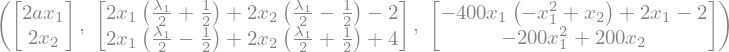

In [153]:
a = symbols('a', real=True)
lambda1 = symbols('lambda1',  positive=True)
nf1 = dtutools.gradient(f1(x1,x2,a),(x1,x2))
nf2 = dtutools.gradient(f2(x1,x2,lambda1),(x1,x2))
nf3 = dtutools.gradient(f3(x1,x2),(x1,x2))
nf1, nf2, nf3

Vi sætter nu $a = 0.5$ indtil andet nævnes.

### Spørgsmål g

Plot for $a=0.5$ gradientvektoren af $f_1$ som et vektorfelt $\mathbb{R}^2 \to \mathbb{R}^2$ sammen med niveaukurverne for $f_1$. 

*Hint: Se Python demo for uge 1.*

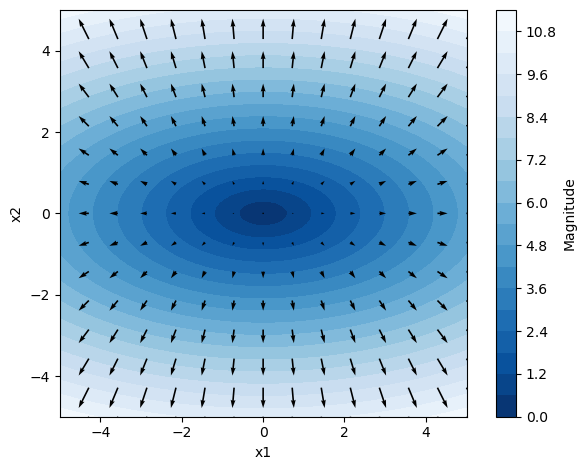

In [154]:
### Answer
nf1 = dtutools.gradient(f1(x1,x2),(x1,x2))
dtuplot.plot_vector(nf1, (x1,-5,5),(x2,-5,5),
    quiver_kw={"color":"black"},
    contour_kw={"cmap": "Blues_r", "levels": 20},
    grid=False, xlabel="x1", ylabel="x2",n=15)


### Spørgsmål h

Gradientvektoren udspænder den retning hvor "funktionen aftager og vokser mest". Peger gradientvektoren i den retning hvor funktionen aftager eller vokser?

### Svar
Gradientvektoren peger i den retning, hvor funktionen vokser hurtigst. Det vil sige, at gradienten $\nabla f(x)$ angiver den retning, hvor stigningstakten er størst, og dermed går funktionen opad hurtigst.


### Spørgsmål i

Find en parametrisering $\pmb{r}(t)$ af niveaukuverne af $\{(x_1, x_2) \in \mathbb{R}^2 | f_1(x_1,x_2) =c \}$ for *hver* værdi af $c \in ]0,\infty[$. Husk at $a=1/2$. 

*Hint*: 1) Niveaukurverne er ellipser, hvis semi-akser afhænger af $\sqrt{c}$. 2) Vektorfunktioen $\pmb{r}(t) = (1 \cos(t), 2 \sin(t))$ for $t \in [0, 2 \pi]$ parametriserer ellipser med centrum i $(0,0)$ og med semi-akser $1$ og $2$.

#### Svar
Vi har funktionen:
$$
f_1(x_1,x_2) = \frac{1}{2}x_1^2 +x_2^2
$$
Niveaukurverne for en given $c>0$ opfylder
$$
\frac{1}{2}x_1^2 + x_2^2 = c \Leftrightarrow x_1^2 + 2x_2^2 = 2c
$$
Vi kan omskrive denne ligning til standardformen for en ellipse:
$$
\frac{x_1^2}{2c} + \frac{2x_2^2}{2c} = 1 \Leftrightarrow \frac{x_1^2}{2c} + \frac{x_2^2}{c} = 1
$$
Her har vi en ellipse med centrum i $(0,0)$ og med semi-akser
$$
A = \sqrt{2c} \quad (x_1 \text{-retningen}) \quad \text{og} \quad B = \sqrt{c} \quad (x_2 \text{-retningen})
$$
En naturlig parametrisering af en ellipse med disse semi-akser er
$$
r(t)= (\sqrt{2c}cos(t), \sqrt{c}sin(t)), \quad t \in [0,2\pi]
$$
Denne vektorfunktions-parametrisering dækker alle punkter på niveaukurven for $f_1(x_1,x_2)=c$ for ethvert $c \in ]0,\infty[$.

### Spørgsmål j

Lad $\pmb{x}_0 = (1,2)$. Udregn $f_1(\pmb{x}_0)$ og angiv parameterfremstillingen $\pmb{r}(t)$ for niveaukurven gennem $\pmb{x}_0$. Bestem den $t_0$-værdi så  $\pmb{r}(t_0) = (1,2)$. Find tangentvektoren $\pmb{r}'(t_0)$ i punktet $\pmb{x}_0$. Udregn gradientvektoren i punktet og vis at $\pmb{r}'(t_0)$ og $\nabla f_1(1,2)$ er ortogonale.

*Hint*: $t_0$ opfylder ligningen $\cos(t_0) = 1/3$. (Hvis du ikke kan komme igennem opgaven, så gå videre med de næste opgaver og vend til opgaven senere. Resultatet fra denne opgave bruges ikke i det følgende.)

#### Svar

Vi har funktionen:
$$
f_1(x_1,x_2) = \frac{1}{2}x_1^2 +x_2^2
$$
og startpunktet $x_0=(1,2)$. Vi kan nu indsætte $x_0$.
$$
f_1(1,2) = \frac{1}{2}1^2 +2^2 = 0.5 + 4 = \frac{9}{2}
$$
Vi har nu at $c = \frac{9}{2}$.

**Parameterfremstilling af niveaukurven**

Niveaukurven fandt vi givet ved
$$
\frac{x_1^2}{2c} + \frac{x_2^2}{c} = 1 \Leftrightarrow \frac{x_1^2}{9} + \frac{x_2^2}{\frac{9}{2}} = 1
$$
Vi har nu 
$$
A = \sqrt{9} = 3 \quad (x_1 \text{-retningen}) \quad \text{og} \quad B = \sqrt{\frac{9}{2}} = \frac{3}{\sqrt{2}} \quad (x_2 \text{-retningen})
$$
Så parameterfremstillingen for niveaukurven bliver
$$
r(t) = (3cos(t) + \frac{3}{\sqrt{2}}sin(t)), \quad t \in [0,2 \pi]
$$

**Bestemmelse når $r(t_0)=(1,2)$**

Vi ønsker at finde $t_0$ med
$$
3cos(t_0) = 1 \quad \text{og} \quad \frac{3}{\sqrt{2}}sin(t_0) = 2
$$
Vi får nu
$$
cos(t_0) = \frac{1}{3} \quad \text{og} \quad sin(t_0) = \frac{2\sqrt{2}}{3}
$$
Vi bemærker kort, at
$$
\frac{1}{3}^2 + \frac{2\sqrt{2}}{3}^2 = \frac{1}{9} + \frac{8}{9} = 1
$$
så der er konsistens. Altså er $t_0$ bestemt ved
$$
cos(t_0) = \frac{1}{3} \quad \text{og} \quad sin(t_0) = \frac{2\sqrt{2}}{3}
$$

**Bestemmelse af tangentvektoren $r'(t)$ og $r'(t_0)$**

Differentierer vi funktionen for $r(t)$ med hensyn til $t$ får vi:
$$
r'(t) = (-3sin(t), \frac{3}{\sqrt{2}}cos(t))
$$
Ved $t_0$ bliver tangentvektoren
$$
r'(t_0) = (-3 \cdot \frac{2\sqrt{2}}{3}, \frac{3}{\sqrt{2}} \cdot \frac{1}{3}) = (-2\sqrt{2}, \frac{1}{\sqrt{2}})
$$

**Udregninga af gradientvektoren $\nabla f_1$ i punktet $x_0$**

Vi ved at gradienten udregnes som:
$$
\nabla f_1 = \begin{bmatrix} \frac{\partial f_1}{\partial x_1}(x^\dagger) \\
\frac{\partial f_1}{\partial x_2}(x^\dagger) \end{bmatrix} = \begin{bmatrix} x_1 \\
2x_2 \end{bmatrix}
$$
vi indsætter for $x_0 = (1,2)$
$$
\nabla f_1(x_0) = 
\begin{bmatrix} 
1 \\
2 \cdot 2 
\end{bmatrix} =
\begin{bmatrix} 
1 \\
4
\end{bmatrix}
$$

**Vis at $r'(t_0)$ og $\nabla f_1(1,2)$ er ortogonale**

Vi beregner skalarproduktet:
$$
r'(t_0) \cdot \nabla f_1(1,2) = 
\begin{bmatrix} 
-2\sqrt{2} \\
\frac{1}{\sqrt{2}}
\end{bmatrix}
\cdot
\begin{bmatrix} 
1 \\
4
\end{bmatrix} = 
-2\sqrt{2} \cdot 1 + \frac{1}{\sqrt{2}} \cdot 4 = -2\sqrt{2} + \frac{4}{\sqrt{2}}
$$
da $\frac{4}{\sqrt{2}} = 2\sqrt{2}$ har vi 
$$
r'(t_0) \cdot \nabla f_1(1,2) = -2\sqrt{2} + \frac{4}{\sqrt{2}} = 0
$$
Da er skalarproduktet nul, og dermed er tangentvektoren og gradienten ortogonale.

## Trinvis gradientretning for $f_1$

Vi opfatter punktet $\pmb{x}_0 = (1,2)$ som vores startgæt. Vi vil nu prøve at bruge information om gradientvektoren $\nabla f_1$ til iterativt at finde frem til minimumspunktet for $f_1$. I hvert trin vil vi flytte os i gradientvektorens retning. Da vi ønsker at gøre værdien af $f_1(1,2)$ mindre, må vi skulle bevæge os i retning af $-\nabla f_1(\pmb{x}_0)$, altså den negative gradient-retning. Vi definerer først gradientvektoren som en Python-funktion:

In [155]:
def nf1(x1, x2, a = 0.5):
    return Matrix([2*a*x1, 2*x2])   # gradienten, udregnet tidligere

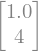

In [156]:
x_0 = Matrix([1,2])
nf1(*x_0)     # * betyder bare at x_0-vektoren splittes op i to argumenter

Vi skal beslutte os for hvor langt vi tør gå i gradientvektorens retning. Vi prøver først at gå $25\%$ af gradientvektorens længde. Dette kaldes *skridtlængden* da vi forestiller os at vi tager et skridt i gradientvektorens negative retning:

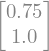

In [157]:
x_1 = x_0 - 0.25 * nf1(*x_0)
x_1

Vi gentager proceduren nogle flere gange.

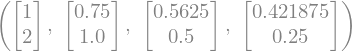

In [158]:
x_2 = x_1 - 0.25 * nf1(*x_1)
x_3 = x_2 - 0.25 * nf1(*x_2)
x_0, x_1, x_2, x_3

### Spørgsmål k

Gentag proceduren mindst 10 gange. Kommer vi frem til minimumspunktet $\pmb{x}^{\dagger}$? Hvad er gradientvektoren i minimumspunktet? Prøv at gøre skridtlængde 0.25 større og mindre. Skridtlængden $\alpha = 0.5$ er speciel for vores startgæt. Hvad sker der?

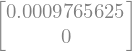

In [159]:
### Svar
x_0 = Matrix([1,2])
n=10
step_size = 0.5
x = x_0
for i in range(n):
    x = x - step_size * nf1(*x)
x


Vi kan samle ovenstående til følgende iterative metode:
\begin{equation*} 
  \pmb{x}_{\text{næste}} = \pmb{x}_{\text{nuværende}} - \alpha \nabla f(\pmb{x}_{\text{nuværende}})
\end{equation*}
hvor $\alpha > 0$ angiver skridtlængden og $f$ er den funktion vil ønsker at minimere. I maskinlæring og kunstig intelligens kaldes $\alpha$ for læringsraten. 

Vi kan selvfølgelig også skrive ovenstående metode som:
\begin{equation*} 
  \pmb{x}_{n+1} = \pmb{x}_{n} - \alpha \nabla f(\pmb{x}_{n})
\end{equation*}
hvor $n = 0,1,2, \dots$ og $\pmb{x}_{0}$ angiver vores startgæt.

###  Spørgsmål l

Hvad er afstanden mellem $\pmb{x}_{n}$ og $\pmb{x}_{n+1}$? Dit svar skal være en formel indeholdende $\alpha, \nabla f(\pmb{x}_{n})$ og normen i $\mathbb{R}^2$.

#### Svar
Afstanden mellem $x_n$ og $x_{n+1}$ kan beregnes som normen af forskellen mellem de to vektorer:
$$
||x_{n+1}-x_n||
$$
Ved at indsætte opdateringsreglen
$$
x_{n+1} = x_{n} - \alpha \nabla f(x_{n})
$$
får vi
$$
x_{n+1}-x_n = -\alpha \nabla f(x_{n})
$$
Tager vi normen på begge sider, får vi
$$
||x_{n+1}-x_n|| = ||-\alpha \nabla f(x_{n})||
$$
Da normen af en skalar gange en vektor er lig med den absolutte værdi af skalaren gange normen af vektoren, får vi:
$$
||x_{n+1}-x_n|| = \alpha ||\nabla f(x_{n})||
$$
Afstanden er altså givet ved
$$
||x_{n+1}-x_n|| = \alpha ||\nabla f(x_{n})||
$$
Dette viser, at afstanden afhænger af både læringsraten $\alpha$ og størrelsen af gradienten $\nabla f(x_n)$.

### Spørgsmål m

Færdiggør følgende kode så outputtet bliver $\pmb{x}_{100}$ med startgæt $\pmb{x}_{0}=(1,2)$ og læringsrate $\alpha = 0.1$:

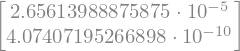

In [160]:
alpha = 0.25
x = Matrix([1,2])
for n in range(100):
    x = x - 0.1 * nf1(*x)
x

## Gradientmetoden: Implementering og videre undersøgelser

Vi vil nu gerne implementere en generel gradientmetode der virker for alle funktioner (hvor vi kan udregne deres gradient) og som automatisk skal stoppe når gradientvektoren bliver lille eller et maks antal iterationer bliver nået. 

Gradientmetoden beskrevet som algoritme:
1. Initialiseringparametre ($\pmb{x}_0$, $\alpha$, tolerance, max iterationer $n_\text{max}$).
1. Opdateringstrin: $\pmb{x}_{n+1} \leftarrow \pmb{x}_{n} - \alpha \nabla f(\pmb{x}_{n})$ og $n \leftarrow n + 1$.
1. Afslutningskriterier: $||\nabla f(\pmb{x}_{\text{nuværende}})|| \le \text{tolerance}$ eller $n = n_\text{max}$.
1. Output: $\pmb{x}_n$ og $n$ for et $n \le n_\text{max}$ hvor afslutningskriteriet er mødt.

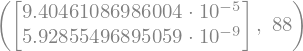

In [161]:
def gradient_method (f, x_0, alpha = 0.01, tol = 0.0001, n_max = 5000):
    nf = dtutools.gradient(f, (x1,x2))
    x = x_0
    nfx = nf.subs({x1: x[0], x2: x[1]})     # gradientvektoren i x_0
    n = 0
    while nfx.norm() > tol and n < n_max:
        x =   x - alpha * nfx # Gradientopdatering
        nfx = nf.subs({x1: x[0], x2: x[1]}) # Gradienten i x opdateres
        n = n + 1
        # print(x)                           # uncomment to see the iterations
    return x, n

gradient_method(f1(x1,x2,0.5), Matrix([1,2]), 0.1)

### Spørgsmål n

Færdiggør koden ovenfor. Der mangler kun kode i tre linjer. Kode-blokken bør give output:  

$\displaystyle \left( \left[\begin{matrix}9.40461086986004 \cdot 10^{-5}\\5.92855496895059 \cdot 10^{-9}\end{matrix}\right], \  88\right)$

Hvad betyder dette output?

#### Svar
Løsningen $x_n$ efter 88 iterationer er stimeret til 
$\begin{bmatrix}9.40461086986004 \cdot 10^{-5}\\5.92855496895059 \cdot 10^{-9}\end{bmatrix}$

Dette viser, at vi nærmer os minimumspunktet $(0,0)$, men stopper når tolerancegrænsen $tol = 0.0001$ er opfyldt.

### Spørgsmål o

Fjern `#` foran `print(x)` og kør koden igen. Hvad ser du?

#### Svar
Vi ser hver itteration vi løber igennem for langsomt at nå til minimum.

### Spørgsmål p

Foretag gradientmetoden for $f_1$ for $a = 0.5$ og $a = 0.01$ med følgende værdier `x_0 = Matrix([1,10])`, `alpha = 0.1`, `tol = 1e-4`, `nmax = 5000`. Hvorfor konvergerer algoritmen meget langsommere for $a = 0.01$? Med konvergens mener vi her blot af skridt i gradientmetoden før den stopper. (Det kan være nyttigt at sætte `#` foran `print(x)` igen i `gradient_method` men dette er valgfrit).

*Hint*: Hvilken retning peger gradientvektoren når $a$ bliver lille?

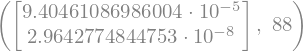

In [162]:
gradient_method(f1(x1,x2,0.5), Matrix([1,10]), 0.1, tol = 1e-4, n_max=5000)

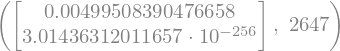

In [163]:
gradient_method(f1(x1,x2,0.01), Matrix([1,10]), 0.1, tol = 1e-4, n_max=5000)

#### Svar
Når $a$ er lille, bliver gradienten af $f_1(x_1,x_2)$ givet ved:
$$
\nabla f_1(x_1,x_2) = \begin{bmatrix} 2ax_1 \\
2x_2 \end{bmatrix}
$$
* for $a = 0.5$: 
$$
\nabla f_1(1,10) = 
\begin{bmatrix} 1 \\
20 \end{bmatrix} 
$$
* for $a = 0.01$: 
$$
\nabla f_1(1,10) = 
\begin{bmatrix} 0.02 \\
20 \end{bmatrix} 
$$
Når $a$ er lille, bliver gradientens første komponent meget lille sammenlignet med den anden. Det betyder, at gradienten næsten kun peger i $x_2$-retningen. Dette skaber et problem:
* Funktionen har en smal, aflang form i $x_1$-retningen og en stejlere form i $x_2$-retningen.
* Gradientmetoden tager skridt proportionale med gradientens størrelse, så når gradienten næsten kun peger i $x_2$-retningen, vil opdateringer i $x_1$-retningen være ekstremt små.
* Dette resulterer i meget små skridt i $x_1$-retningen, hvilket får algoritmen til at tage mange flere iterationer for at nå minimum.

### Spørgsmål q

Vi har brugt forskellige `alpha`-værdier ovenfor, men hvilken bør man egentligt bruge? Det er ikke nemt at svare på og afhænger meget af anvendelsen (funktionen vi vil optimere!). Stil en **chatbot** (fx https://copilot.microsoft.com/) følgende spørgsmål: "Hvilken læringsrate ville du  bruge i gradientmetoden?". Hvis chatbottens svar er meget langt, og du ikke ønsker at læse så meget tekst, så bed den om at give et kortere svar. Omvendt, hvis der er detaljer i chatbottens svar du synes er uklare, så bed chatbotten om at forklare nærmere.

![image.png](../images/chatbotSvarWeek2.png)

### Spørgsmål r

For funktionerne $f_1$ og $f_2$ kan man vælge en høj skridtlængde/læringsrate $\alpha$ (dog ikke over 1, prøv!), men man skal ofte vælge læringsraten $\alpha$ som $0.1$, $0.01$ eller endda $0.001$. 
Dette gælder fx for $f_3$-funktionen, hvor $\alpha$ skal vælges lille. Opgaven er at finde minimumspunktet $\pmb{x}^{\dagger}$ for funktionen. Kig tilbage på dine plots af funktionen for at komme med et godt startgæt.

#### Svar
Fra konturplottet kan vi observere, at niveaukurverne har en karakteristisk bananform, og minimum ser ud til at ligge tæt ved $(1,1)$.

Et passende startgæt for gradientmetoden kunne være $x_0=(0.8,0.9)$ eller $x_0=(0.9,0.95)$, da vi vil se, hvordan gradient descent fører os til minimum.

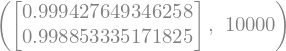

In [164]:
gradient_method(f3(x1,x2), Matrix([0.94,0.95]), alpha=0.001, tol = 1e-4, n_max=10000)

### Spørgsmål s (valgfrit)

Her er en lille konkurrence: Find minimum for følgende $f_4$-funktion:

$$
f_4(x_1,x_2) = \left(\sqrt{3} - \frac{\sqrt{2}}{2}(x_1-x_2)\right)^2 
+ \frac{37\sqrt{\pi}}{2}\left[\sqrt{2}(x_1+x_2) - (x_1-x_2)^2\right]^2 
+ \sqrt{3\pi}.
$$

Du kan skrive det bedste bud på et minimumspunkt (sammen med funktionsværdien) ind i diskussionsforummet Ed.

In [165]:
def f4(x1, x2):
    return (sqrt(3) - (sqrt(2)/2)*(x1 - x2))**2 + (37*sqrt(pi)/2) * (sqrt(2)*(x1 + x2) - (x1 - x2)**2)**2 + sqrt(3*pi)

### Spørgsmål t (valgfrit)

Skriv et Python-program der plotter den sti vi går af med gradientmetoden. Du skal altså plotte listen af punkter $\pmb{x}_0, \pmb{x}_1,\pmb{x}_2,\pmb{x}_3,\pmb{x}_4, \dots$ (forbundet med rette linjer). Stien bør plottes ovenpå et plot af niveaukurverne. Test dit program for $f_1, f_2$ og $f_3$.

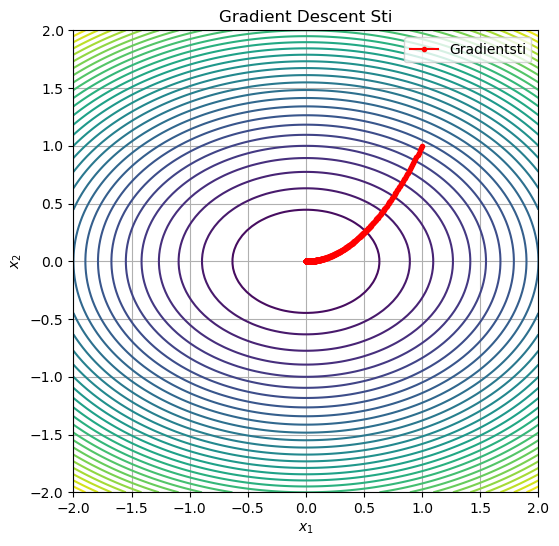

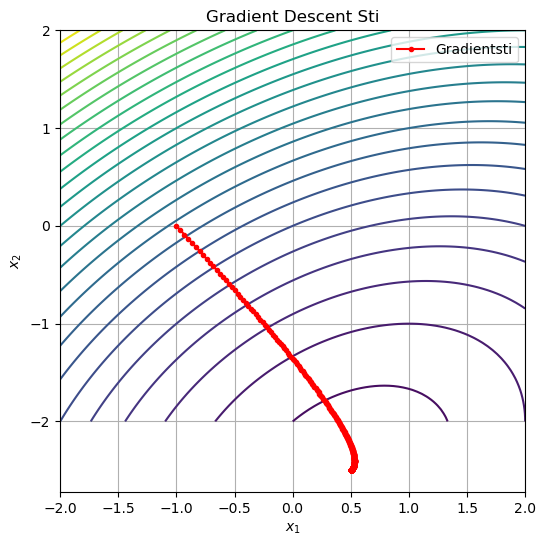

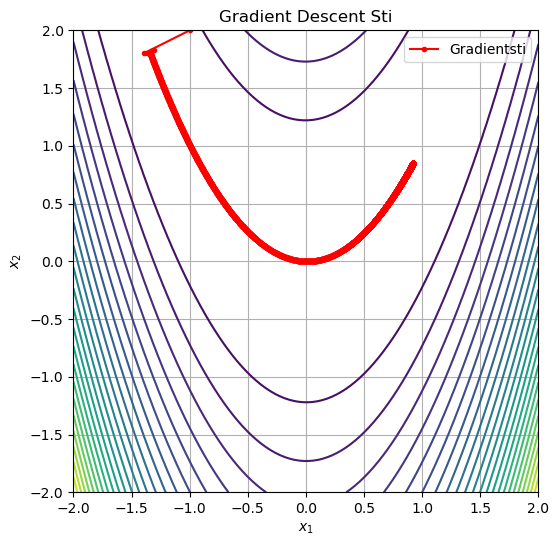

In [167]:
import numpy as np
import matplotlib.pyplot as plt

# Funktion til at udføre gradient descent og returnere stien af punkter
def gradient_method_path(f, x_0, alpha=0.01, tol=0.0001, n_max=5000):
    # Beregn gradient
    nf = Matrix([diff(f, x1), diff(f, x2)])

    # Initialisering
    x = Matrix(x_0)
    path = [np.array(x, dtype=float).flatten()]  # Gemmer stien af punkter
    nfx = nf.subs({x1: x[0], x2: x[1]})  # Evaluér gradientvektoren i startpunktet
    n = 0

    while nfx.norm() > tol and n < n_max:
        x = x - alpha * nfx  # Gradientopdatering
        path.append(np.array(x, dtype=float).flatten())  # Gem nuværende punkt
        nfx = nf.subs({x1: x[0], x2: x[1]})  # Opdater gradientvektoren
        n += 1

    return np.array(path), n

# Funktion til at plotte niveaukurver og gradientsti
def plot_gradient_path(f, x_0, alpha=0.01, tol=0.0001, n_max=5000):
    # Beregn stien af punkter
    path, n = gradient_method_path(f, x_0, alpha, tol, n_max)

    # Generer meshgrid til konturplot
    x_vals = np.linspace(-2, 2, 100)
    y_vals = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.array([[f.subs({x1: X[i, j], x2: Y[i, j]}) for j in range(X.shape[1])] for i in range(X.shape[0])], dtype=float)

    # Plot konturlinjer
    plt.figure(figsize=(6,6))
    plt.contour(X, Y, Z, levels=30, cmap="viridis")

    # Plot gradientsti
    plt.plot(path[:, 0], path[:, 1], marker='o', linestyle='-', color='red', markersize=3, label="Gradientsti")

    # Labels og titel
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("Gradient Descent Sti")
    plt.legend()
    plt.grid()
    plt.show()

alpha = 0.01

# Plot for f1
plot_gradient_path(f1(x1, x2, 0.5), [1,1], alpha=alpha)

# Plot for f2
plot_gradient_path(f2(x1, x2, 0.5), [-1,0], alpha=alpha)

# Plot for f3 (kræver mindre alpha for at konvergere)
plot_gradient_path(f3(x1, x2), [-1,2], alpha=alpha*0.1)


### Spørgsmål u (valgfrit)

Under træning af neurale netværk benyttes ofte en variant af gradientmetoden som hedder den stokastiske gradient-metode (stochastic gradient descent method, forkortet SGD). Undersøg på egen hånd (lav en Google-søgning, spørg en chatbot, slå op i en bog, osv.) hvad metoden gør anderledes. Forklar forskellen med egne ord.

### Spørgsmål v (valgfrit)

I [](spm:h_tema01) påstod vi at gradienten peger i den retning funktionen vokser mest. Vis dette! Det er <a href="../_assets/textbook_mat1b_en.pdf#exe:max-direct-deriv-in-grad">denne opgave</a> i Kapitel 3.